# Paper Charts

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
sectors = pd.read_csv('data/sectors.csv')

In [102]:
avg_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='TOTAL EMISSIONS',
    aggfunc=np.mean
).reset_index().drop(index=0)

In [103]:
for col in avg_BySector.columns[1:]:
    avg_BySector[col] = (avg_BySector[col] / 100000).round(2)

SECTOR,YEAR,Auto,Energy,Food & Agriculture,Tech
1,2018,2121.97,3216.96,424.83,252.22
2,2019,2381.66,3868.26,428.76,308.25
3,2020,2163.87,4222.12,413.22,316.17
4,2021,2328.24,4218.85,423.06,428.66
5,2022,2620.95,3604.04,422.71,459.06


In [122]:
scope1_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 1',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope1_BySector.columns[1:]:
    scope1_BySector[col] = (scope1_BySector[col] / 100000).round(2)

scope2_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 2 (location-based)',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope2_BySector.columns[1:]:
    scope2_BySector[col] = (scope2_BySector[col] / 100000).round(2)

scope3_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 3',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope3_BySector.columns[1:]:
    scope3_BySector[col] = (scope3_BySector[col] / 100000).round(2)

Text(0.5, 0.98, 'Average Total Emissions by Sector Over Time (2018 - 2022)')

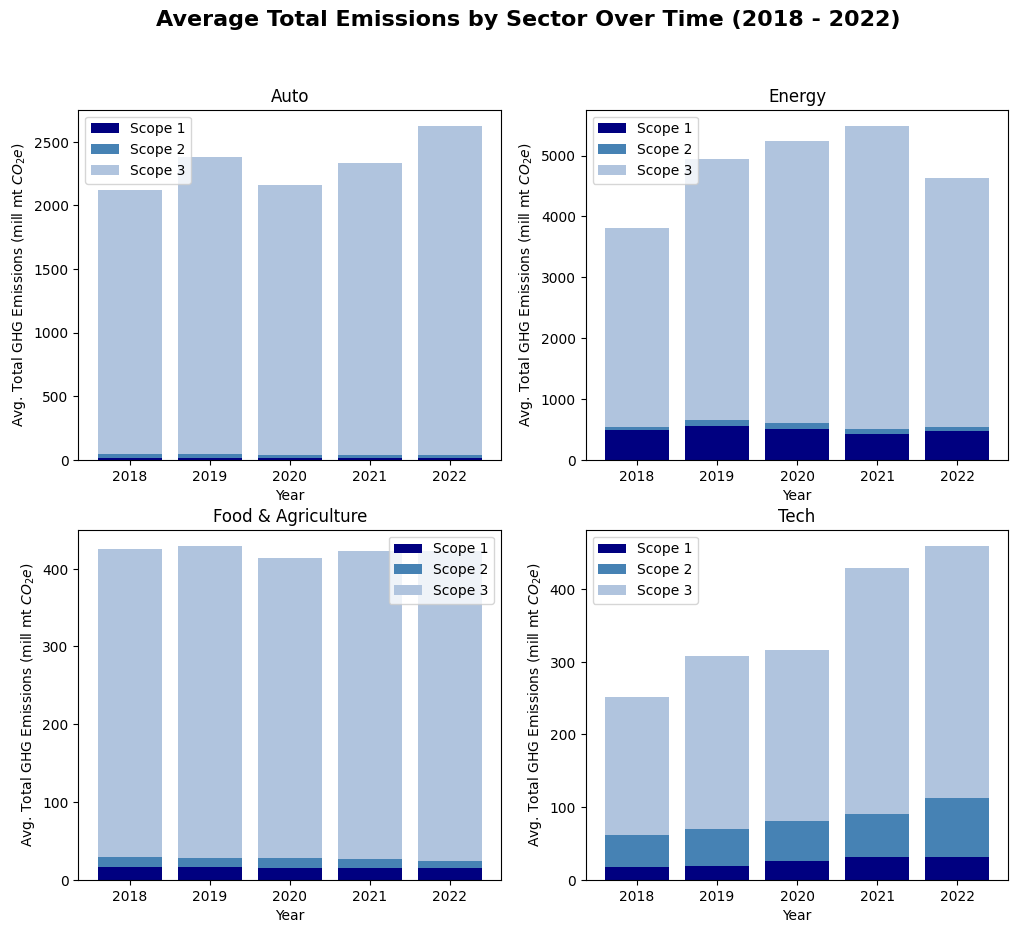

In [123]:
n=1
plt.figure(figsize=[12,10])
for col in avg_BySector.columns[1:]:
    plt.subplot(2,2,n)
    plt.bar(scope1_BySector['YEAR'], height=scope1_BySector[col], color='navy', label='Scope 1')
    plt.bar(scope2_BySector['YEAR'], height=scope2_BySector[col], bottom=scope1_BySector[col], color='steelblue', label='Scope 2')
    plt.bar(scope3_BySector['YEAR'], height=scope3_BySector[col], bottom=scope1_BySector[col]+scope2_BySector[col], color='lightsteelblue', label='Scope 3')

    plt.se

    plt.xlabel('Year')
    plt.ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    plt.title(col)
    plt.ylim(0, )
    plt.legend()
    n+=1
plt.suptitle('Average Total Emissions by Sector Over Time (2018 - 2022)', fontsize=16, fontweight='bold')
